In [3]:
import sklearn
from sklearn import datasets
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk import word_tokenize        
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import time
from sklearn.feature_extraction import stop_words
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
 types = ['alt.atheism','comp.graphics',
               'comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware',
               'comp.sys.ibm.pc.hardware','comp.windows.x','misc.forsale',
               'rec.autos','rec.motorcycles','rec.sport.baseball'
               ,'rec.sport.hockey','sci.crypt','sci.electronics','sci.med',
               'sci.space','soc.religion.christian','talk.politics.guns',
               'talk.politics.mideast','talk.politics.misc','talk.religion.misc']

In [5]:
train= sklearn.datasets.fetch_20newsgroups(subset='train',remove=(['headers','footers','quotes']),shuffle=True,random_state=42,categories=types)
tests= sklearn.datasets.fetch_20newsgroups(subset='test',remove=(['headers','footers','quotes']),shuffle=True,random_state=42,categories=types)

In [0]:
# class LemmaTokenizer:
#      def __init__(self):
#          self.wnl = WordNetLemmatizer()
#      def __call__(self, doc):
#          return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
# stopwords = nltk.corpus.stopwords.words('english')
# count_vect = CountVectorizer(stop_words=stopwords,lowercase=True,min_df=3)
# #count_vect_test= CountVectorizer(tokenizer=LemmaTokenizer(),lowercase=True,stop_words={'to','a','the','this','them','these','those'})
# X_train_counts = count_vect.fit_transform(train.data)
# X_train_scale= normalize(X_train_counts)#scaler.fit_transform(X_train_counts)
# X_test_counts = count_vect.transform(tests.data)
# X_test_scale= normalize(X_test_counts)#scaler.transform(X_test_counts)
# Y_train_scale= train.target
# Y_test_counts =tests.target

In [0]:
#lemmatization analysis
class LemmaTokenizer:
     def __init__(self):
         self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
         return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [0]:
#Data Preprocessing for Decision Tree
sub=[]
subtest=[]
for res in train.data:
  sub.append(res.replace("\n","").replace("-",""))
for res in tests.data:
  subtest.append(res.replace("\n","").replace("-",""))

## Models


### Logistic Regression

In [0]:
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_scale)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)
stoplist = nltk.corpus.stopwords.words('english')
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words=stoplist,lowercase=True,min_df=3)),
    ('norm',Normalizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',LogisticRegression()),
 ])

tuned_parameters= [{'clf__C':[1.0,1.5,2.0,2.5,3.0,4.0,5.0],'clf__tol': [1e-4],'clf__max_iter':[400]}]
t1_start = time.time() 
clf=GridSearchCV(text_clf, tuned_parameters, scoring='accuracy',cv=5, n_jobs=-1)
clf.fit(train.data,train.target)
print(clf.best_params_)
print(clf.cv_results_['rank_test_score'])
print(clf.cv_results_['mean_test_score'])
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'clf__C': 3.0, 'clf__max_iter': 400, 'clf__tol': 0.0001}
[7 6 3 2 1 4 5]
[0.7440398  0.74823139 0.75009411 0.75111897 0.75223659 0.7496286
 0.74860409]
processing time is : 431.88779497146606


###### LR Plot

Text(0.5, 1.0, 'CV Train Accuracy VS Smooth factor C')

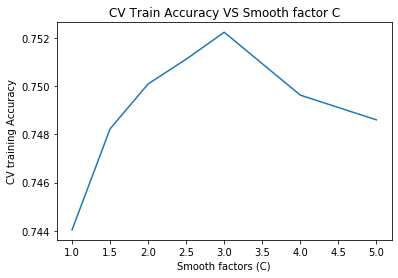

In [0]:
plt.plot([1.0,1.5,2.0,2.5,3.0,4.0,5.0], [0.7440398,0.74823139,0.75009411,0.75111897,0.75223659,0.7496286, 0.74860409])
plt.ylabel('CV training Accuracy')
plt.xlabel('Smooth factors (C)')
plt.title('CV Train Accuracy VS Smooth factor C')

### Test Accuracy

In [8]:
lg = LogisticRegression(C=3,tol=1e-12,max_iter=10000)
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(stop_words=stoplist,lowercase=True, ngram_range=(1,2),max_features=60000)
tfidf_transformer = TfidfTransformer()
#Train data retrieve
t1_start = time.time()
X_train_counts = count_vect.fit_transform(train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
lg.fit(X_train_tfidf, train.target)
#Test data retrieve
X_test_counts = count_vect.transform(tests.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

#Print the test accuracy
predicted = lg.predict(X_test_tfidf)
t1_end = time.time() 
print(classification_report(tests.target, predicted))
print('mean',np.mean(predicted==tests.target))
print('processing time is :',t1_end-t1_start)

              precision    recall  f1-score   support

           0       0.51      0.47      0.49       319
           1       0.63      0.71      0.67       389
           2       0.64      0.63      0.64       394
           3       0.69      0.69      0.69       392
           5       0.83      0.70      0.76       395
           6       0.79      0.80      0.80       390
           7       0.74      0.71      0.73       396
           8       0.76      0.78      0.77       398
           9       0.56      0.85      0.68       397
          10       0.89      0.86      0.87       399
          11       0.87      0.69      0.77       396
          12       0.59      0.60      0.60       393
          13       0.77      0.76      0.77       396
          14       0.72      0.76      0.74       394
          15       0.65      0.78      0.71       398
          16       0.58      0.66      0.62       364
          17       0.85      0.74      0.79       376
          18       0.56    

### Time Consumption

In [9]:
lg = LogisticRegression()
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(lowercase=True, binary=True)
tfidf_transformer = TfidfTransformer()
#Train data retrieve
t1_start = time.time()
X_train_counts = count_vect.fit_transform(train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
lg.fit(X_train_tfidf, train.target)
#Test data retrieve
X_test_counts = count_vect.transform(tests.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

#Print the test accuracy
predicted = lg.predict(X_test_tfidf)
t1_end = time.time() 
print(classification_report(tests.target, predicted))
print('mean',np.mean(predicted==tests.target))
print('processing time is :',t1_end-t1_start)

              precision    recall  f1-score   support

           0       0.47      0.44      0.45       319
           1       0.61      0.72      0.66       389
           2       0.67      0.62      0.65       394
           3       0.72      0.69      0.71       392
           5       0.84      0.71      0.77       395
           6       0.78      0.83      0.80       390
           7       0.76      0.71      0.73       396
           8       0.49      0.81      0.61       398
           9       0.77      0.82      0.80       397
          10       0.92      0.85      0.89       399
          11       0.87      0.68      0.77       396
          12       0.59      0.61      0.60       393
          13       0.79      0.73      0.76       396
          14       0.70      0.74      0.72       394
          15       0.60      0.82      0.70       398
          16       0.57      0.71      0.63       364
          17       0.83      0.76      0.79       376
          18       0.65    

### Decision Tree

#### GridSearch K_fold validation

In [0]:
stoplist = nltk.corpus.stopwords.words('english')
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words=stoplist,lowercase=True)),
    ('norm',Normalizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',tree.DecisionTreeClassifier()),
 ])

tuned_parameters= [{'clf__max_depth':[50,100,200,400,None],'clf__max_features':[None],'clf__splitter':['random','best']}]
t1_start = time.time() 
clf=GridSearchCV(text_clf, tuned_parameters, scoring='accuracy',cv=5, n_jobs=-1)
clf.fit(sub,train.target)
print(clf.best_params_)
print(clf.cv_results_['rank_test_score'])
print(clf.cv_results_['mean_test_score'])
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)

{'clf__max_depth': 400, 'clf__max_features': None, 'clf__splitter': 'random'}
[10  9  7  8  5  6  1  4  2  3]
[0.3622382  0.3722991  0.42548487 0.41831281 0.45724687 0.45175126
 0.47419863 0.46413991 0.4721487  0.46423189]
processing time is : 607.0480010509491


### Test Accuracy

In [0]:
#applied sub and subtest as the traindata and testdata, improved accuracy by 0.005
count_vect=CountVectorizer(stop_words=stoplist,lowercase=True)
tfidf_transformer = TfidfTransformer()
t1_start = time.time()
X_train_counts = count_vect.fit_transform(sub)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(subtest)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

DT_clf = tree.DecisionTreeClassifier(max_depth=600, max_features=None, max_leaf_nodes=1500, splitter='random',min_samples_split=4)
DT_clf=DT_clf.fit(X_train_tfidf,train.target )
predicted = DT_clf.predict(X_test_tfidf)
t1_end = time.time() 
print(classification_report(tests.target, predicted))
print(np.mean(predicted ==tests.target))
print('processing time is :',t1_end-t1_start)

              precision    recall  f1-score   support

           0       0.26      0.21      0.23       319
           1       0.37      0.46      0.41       389
           2       0.43      0.40      0.42       394
           3       0.44      0.41      0.42       392
           5       0.51      0.43      0.47       395
           6       0.58      0.57      0.57       390
           7       0.24      0.63      0.35       396
           8       0.64      0.54      0.59       398
           9       0.65      0.49      0.55       397
          10       0.64      0.62      0.63       399
          11       0.60      0.47      0.53       396
          12       0.35      0.26      0.30       393
          13       0.42      0.41      0.41       396
          14       0.56      0.49      0.53       394
          15       0.47      0.55      0.51       398
          16       0.33      0.41      0.37       364
          17       0.61      0.46      0.52       376
          18       0.32    

### Time Consumption

In [10]:
#applied sub and subtest as the traindata and testdata, improved accuracy by 0.005
count_vect=CountVectorizer(lowercase=True,binary=True)
tfidf_transformer = TfidfTransformer()
t1_start = time.time()
X_train_counts = count_vect.fit_transform(sub)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(subtest)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

DT_clf = tree.DecisionTreeClassifier()
DT_clf=DT_clf.fit(X_train_tfidf,train.target )
predicted = DT_clf.predict(X_test_tfidf)
t1_end = time.time() 
print(classification_report(tests.target, predicted))
print(np.mean(predicted ==tests.target))
print('processing time is :',t1_end-t1_start)

              precision    recall  f1-score   support

           0       0.20      0.21      0.20       319
           1       0.36      0.40      0.38       389
           2       0.38      0.35      0.36       394
           3       0.33      0.34      0.34       392
           5       0.46      0.42      0.44       395
           6       0.58      0.53      0.56       390
           7       0.28      0.45      0.35       396
           8       0.50      0.51      0.51       398
           9       0.39      0.42      0.41       397
          10       0.55      0.52      0.54       399
          11       0.55      0.42      0.48       396
          12       0.27      0.26      0.27       393
          13       0.42      0.35      0.38       396
          14       0.43      0.44      0.43       394
          15       0.40      0.37      0.39       398
          16       0.33      0.33      0.33       364
          17       0.48      0.46      0.47       376
          18       0.19    

### Adaboost


In [0]:
stoplist = nltk.corpus.stopwords.words('english')

text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words=stoplist,lowercase=True)),
    ('norm',Normalizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',AdaBoostClassifier()),
 ])

tuned_parameters= [{'clf__learning_rate':[0.1,0.2,0.5,1.0],'clf__n_estimators':[50,100]}]
t1_start = time.time() 
clf=GridSearchCV(text_clf, tuned_parameters, scoring='accuracy',cv=5, n_jobs=-1)
clf.fit(train.data,train.target)
print(clf.best_params_)
print(clf.cv_results_['rank_test_score'])
print(clf.cv_results_['mean_test_score'])
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)

{'clf__learning_rate': 0.5, 'clf__n_estimators': 100}
[8 6 7 3 5 1 4 2]
[0.32544571 0.39185733 0.37304376 0.44327419 0.39605027 0.46628143
 0.40285037 0.46618919]
processing time is : 425.0972776412964


### Test Accuracy

In [0]:
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(stop_words=stoplist,lowercase=True)
tfidf_transformer = TfidfTransformer()
X_train_counts = count_vect.fit_transform(train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(tests.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
t1_start = time.time() 
DT_clf = AdaBoostClassifier(learning_rate=1.75,n_estimators=250,random_state=0)
DT_clf=DT_clf.fit(X_train_tfidf,train.target )
predicted = DT_clf.predict(X_test_tfidf)
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)
print(classification_report(tests.target, predicted))
print(np.mean(predicted ==tests.target))

processing time is : 46.78001260757446
              precision    recall  f1-score   support

           0       0.38      0.28      0.32       319
           1       0.50      0.43      0.46       389
           2       0.43      0.50      0.46       394
           3       0.46      0.45      0.45       392
           5       0.57      0.49      0.52       395
           6       0.49      0.55      0.52       390
           7       0.74      0.42      0.53       396
           8       0.53      0.48      0.50       398
           9       0.17      0.64      0.27       397
          10       0.70      0.47      0.56       399
          11       0.78      0.52      0.62       396
          12       0.29      0.28      0.29       393
          13       0.77      0.31      0.44       396
          14       0.63      0.46      0.53       394
          15       0.40      0.58      0.47       398
          16       0.50      0.35      0.41       364
          17       0.91      0.54      0.6

### Time Consumption

In [11]:
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(lowercase=True,binary=True)
tfidf_transformer = TfidfTransformer()

t1_start = time.time()
X_train_counts = count_vect.fit_transform(train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(tests.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

DT_clf = AdaBoostClassifier()
DT_clf=DT_clf.fit(X_train_tfidf,train.target )
predicted = DT_clf.predict(X_test_tfidf)
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)
print(classification_report(tests.target, predicted))
print(np.mean(predicted ==tests.target))

processing time is : 14.095856428146362
              precision    recall  f1-score   support

           0       0.22      0.01      0.01       319
           1       0.66      0.22      0.33       389
           2       0.64      0.37      0.47       394
           3       0.51      0.38      0.43       392
           5       0.69      0.47      0.56       395
           6       0.79      0.52      0.62       390
           7       0.77      0.39      0.52       396
           8       0.91      0.33      0.48       398
           9       0.77      0.19      0.31       397
          10       0.64      0.57      0.60       399
          11       0.82      0.43      0.56       396
          12       0.09      0.83      0.16       393
          13       0.92      0.19      0.32       396
          14       0.72      0.35      0.47       394
          15       0.52      0.62      0.57       398
          16       0.49      0.23      0.31       364
          17       0.91      0.50      0.

### Linear SVC

In [0]:
stoplist = nltk.corpus.stopwords.words('english')

text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words=stoplist,lowercase=True)),
    ('norm',Normalizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',LinearSVC()),
 ])

tuned_parameters= [{'clf__C':[0.1,0.2,0.3,0.4],'clf__loss':['squared_hinge'],'clf__tol':[1e-4,1e-6,1e-9,1e-11],'clf__max_iter':[100000]}]
t1_start = time.time() 
clf=GridSearchCV(text_clf, tuned_parameters, scoring='accuracy',cv=5, n_jobs=-1)
clf.fit(train.data,train.target)
print(clf.best_params_)
print(clf.cv_results_['rank_test_score'])
print(clf.cv_results_['mean_test_score'])
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)

{'clf__C': 0.4, 'clf__loss': 'squared_hinge', 'clf__max_iter': 100000, 'clf__tol': 0.0001}
[13 13 13 13  9  9  9  9  5  5  5  5  1  1  1  1]
[0.75624135 0.75624135 0.75624135 0.75624135 0.76639445 0.76639445
 0.76639445 0.76639445 0.76797792 0.76797792 0.76797792 0.76797792
 0.76900235 0.76900235 0.76900235 0.76900235]
processing time is : 206.93567657470703


## **Best Performance Test Accuracy**

In [0]:
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(stop_words=stoplist,lowercase=True,ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()
X_train_counts = count_vect.fit_transform(train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(tests.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
t1_start = time.time() 
SVC_clf = LinearSVC(C=0.195,loss='squared_hinge',max_iter=100000,tol= 0.0001)
SVC_clf=SVC_clf.fit(X_train_tfidf,train.target )
predicted = SVC_clf.predict(X_test_tfidf)
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)
print(classification_report(tests.target, predicted))
print(np.mean(predicted ==tests.target))

processing time is : 4.33213472366333
              precision    recall  f1-score   support

           0       0.54      0.42      0.47       319
           1       0.67      0.71      0.69       389
           2       0.67      0.67      0.67       394
           3       0.69      0.73      0.71       392
           5       0.82      0.73      0.78       395
           6       0.73      0.83      0.77       390
           7       0.80      0.71      0.75       396
           8       0.54      0.80      0.64       398
           9       0.82      0.80      0.81       397
          10       0.87      0.90      0.88       399
          11       0.85      0.74      0.79       396
          12       0.67      0.57      0.62       393
          13       0.79      0.79      0.79       396
          14       0.75      0.76      0.75       394
          15       0.58      0.84      0.68       398
          16       0.60      0.69      0.64       364
          17       0.83      0.77      0.80

In [14]:
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(lowercase=True,binary=True)
tfidf_transformer = TfidfTransformer()

t1_start = time.time()
X_train_counts = count_vect.fit_transform(train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(tests.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
 
SVC_clf = LinearSVC()
SVC_clf=SVC_clf.fit(X_train_tfidf,train.target )
predicted = SVC_clf.predict(X_test_tfidf)
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)
print(classification_report(tests.target, predicted))
print(np.mean(predicted ==tests.target))

processing time is : 4.260435342788696
              precision    recall  f1-score   support

           0       0.52      0.49      0.50       319
           1       0.65      0.72      0.69       389
           2       0.62      0.61      0.61       394
           3       0.69      0.71      0.70       392
           5       0.80      0.71      0.75       395
           6       0.81      0.81      0.81       390
           7       0.52      0.77      0.62       396
           8       0.78      0.76      0.77       398
           9       0.83      0.82      0.82       397
          10       0.88      0.86      0.87       399
          11       0.85      0.72      0.78       396
          12       0.65      0.60      0.62       393
          13       0.79      0.78      0.78       396
          14       0.74      0.74      0.74       394
          15       0.67      0.80      0.73       398
          16       0.60      0.69      0.64       364
          17       0.83      0.77      0.7

### Random Forest

In [0]:
stoplist = nltk.corpus.stopwords.words('english')

text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words=stoplist,lowercase=True)),
    ('norm',Normalizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',RandomForestClassifier()),
 ])

tuned_parameters= [{'clf__n_estimators':[50,100,200,300],'clf__max_depth':[1,None]}]
t1_start = time.time() 
clf=GridSearchCV(text_clf, tuned_parameters, scoring='accuracy',cv=5, n_jobs=-1)
clf.fit(train.data,train.target)
print(clf.best_params_)
print(clf.cv_results_['rank_test_score'])
print(clf.cv_results_['mean_test_score'])
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'clf__max_depth': None, 'clf__n_estimators': 300}
[8 7 6 5 4 3 2 1]
[0.22494442 0.31334056 0.37900635 0.43275087 0.65471391 0.67175891
 0.68191218 0.68265689]
processing time is : 1405.1961953639984


### Test Accuracy

In [0]:
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(stop_words=stoplist,lowercase=True)
tfidf_transformer = TfidfTransformer()
X_train_counts = count_vect.fit_transform(train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(tests.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
t1_start = time.time() 
RF_clf = RandomForestClassifier(max_depth=None,n_estimators= 3000,n_jobs=-1)
RF_clf=RF_clf.fit(X_train_tfidf,train.target )
predicted = RF_clf.predict(X_test_tfidf)
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)
print(classification_report(tests.target, predicted))
print(np.mean(predicted ==tests.target))

processing time is : 1438.9273569583893
              precision    recall  f1-score   support

           0       0.46      0.36      0.40       319
           1       0.60      0.62      0.61       389
           2       0.60      0.68      0.64       394
           3       0.65      0.65      0.65       392
           5       0.69      0.72      0.71       395
           6       0.72      0.79      0.75       390
           7       0.44      0.70      0.54       396
           8       0.66      0.72      0.69       398
           9       0.75      0.80      0.78       397
          10       0.82      0.85      0.84       399
          11       0.81      0.67      0.73       396
          12       0.55      0.47      0.50       393
          13       0.78      0.66      0.72       396
          14       0.74      0.67      0.70       394
          15       0.57      0.80      0.67       398
          16       0.53      0.63      0.58       364
          17       0.87      0.71      0.

In [15]:
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(lowercase=True,binary=True)
tfidf_transformer = TfidfTransformer()
X_train_counts = count_vect.fit_transform(train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(tests.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
t1_start = time.time() 
RF_clf = RandomForestClassifier()
RF_clf=RF_clf.fit(X_train_tfidf,train.target )
predicted = RF_clf.predict(X_test_tfidf)
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)
print(classification_report(tests.target, predicted))
print(np.mean(predicted ==tests.target))

processing time is : 55.541654109954834
              precision    recall  f1-score   support

           0       0.36      0.29      0.32       319
           1       0.53      0.61      0.57       389
           2       0.52      0.62      0.57       394
           3       0.62      0.61      0.62       392
           5       0.71      0.66      0.68       395
           6       0.73      0.78      0.76       390
           7       0.43      0.66      0.52       396
           8       0.60      0.68      0.63       398
           9       0.57      0.77      0.65       397
          10       0.77      0.78      0.78       399
          11       0.75      0.67      0.71       396
          12       0.53      0.39      0.45       393
          13       0.72      0.57      0.64       396
          14       0.65      0.66      0.66       394
          15       0.53      0.75      0.62       398
          16       0.54      0.61      0.58       364
          17       0.82      0.68      0.

### Multinomial Naive Bayes

In [0]:
stoplist = nltk.corpus.stopwords.words('english')
stoplist.append('\n')
stoplist.append(' ')
stoplist.append('"')
stoplist.append('|')
stoplist.append('/')
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words=stoplist,lowercase=True)),
    ('norm',Normalizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',MultinomialNB()),
 ])

tuned_parameters= [{'clf__alpha':[0.01,0.015,0.0195,0.02,0.025,0.03,0.04,0.05]}]
t1_start = time.time() 
clf=GridSearchCV(text_clf, tuned_parameters, scoring='accuracy',cv=5, n_jobs=-1)
clf.fit(train.data,train.target)
print(clf.best_params_)
print(clf.cv_results_['rank_test_score'])
print(clf.cv_results_['mean_test_score'])
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)

{'clf__alpha': 0.02}
[4 6 2 1 3 5 7 8]
[0.77133075 0.77086498 0.77226224 0.77226228 0.7715171  0.77123764
 0.76695315 0.76574238]
processing time is : 71.96315693855286


### Test Accuracy

In [0]:
stoplist = nltk.corpus.stopwords.words('english')

count_vect=CountVectorizer(stop_words=stoplist,lowercase=True, ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()
X_train_counts = count_vect.fit_transform(train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(tests.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
t1_start = time.time() 
RF_clf = MultinomialNB(alpha=0.0190)
RF_clf=RF_clf.fit(X_train_tfidf,train.target )
predicted = RF_clf.predict(X_test_tfidf)
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)
print(classification_report(tests.target, predicted))
print(np.mean(predicted ==tests.target))

processing time is : 1.1248722076416016
              precision    recall  f1-score   support

           0       0.74      0.37      0.49       319
           1       0.68      0.72      0.70       389
           2       0.73      0.58      0.64       394
           3       0.68      0.77      0.73       392
           5       0.82      0.76      0.79       395
           6       0.82      0.81      0.82       390
           7       0.81      0.74      0.77       396
           8       0.82      0.72      0.77       398
           9       0.94      0.81      0.87       397
          10       0.60      0.94      0.74       399
          11       0.69      0.80      0.74       396
          12       0.75      0.57      0.65       393
          13       0.81      0.78      0.79       396
          14       0.76      0.80      0.78       394
          15       0.48      0.91      0.63       398
          16       0.59      0.75      0.66       364
          17       0.76      0.81      0.

In [16]:
stoplist = nltk.corpus.stopwords.words('english')

count_vect=CountVectorizer(lowercase=True, binary=True)
tfidf_transformer = TfidfTransformer()
t1_start = time.time() 
X_train_counts = count_vect.fit_transform(train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(tests.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

RF_clf = MultinomialNB()
RF_clf=RF_clf.fit(X_train_tfidf,train.target )
predicted = RF_clf.predict(X_test_tfidf)
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)
print(classification_report(tests.target, predicted))
print(np.mean(predicted ==tests.target))

processing time is : 2.8448593616485596
              precision    recall  f1-score   support

           0       0.78      0.07      0.12       319
           1       0.72      0.58      0.64       389
           2       0.73      0.43      0.54       394
           3       0.58      0.84      0.69       392
           5       0.76      0.78      0.77       395
           6       0.88      0.72      0.79       390
           7       0.85      0.66      0.75       396
           8       0.88      0.62      0.73       398
           9       0.95      0.71      0.81       397
          10       0.60      0.91      0.73       399
          11       0.47      0.81      0.59       396
          12       0.76      0.43      0.55       393
          13       0.85      0.65      0.74       396
          14       0.83      0.65      0.73       394
          15       0.24      0.94      0.38       398
          16       0.60      0.59      0.59       364
          17       0.84      0.70      0.

### Result Visualization

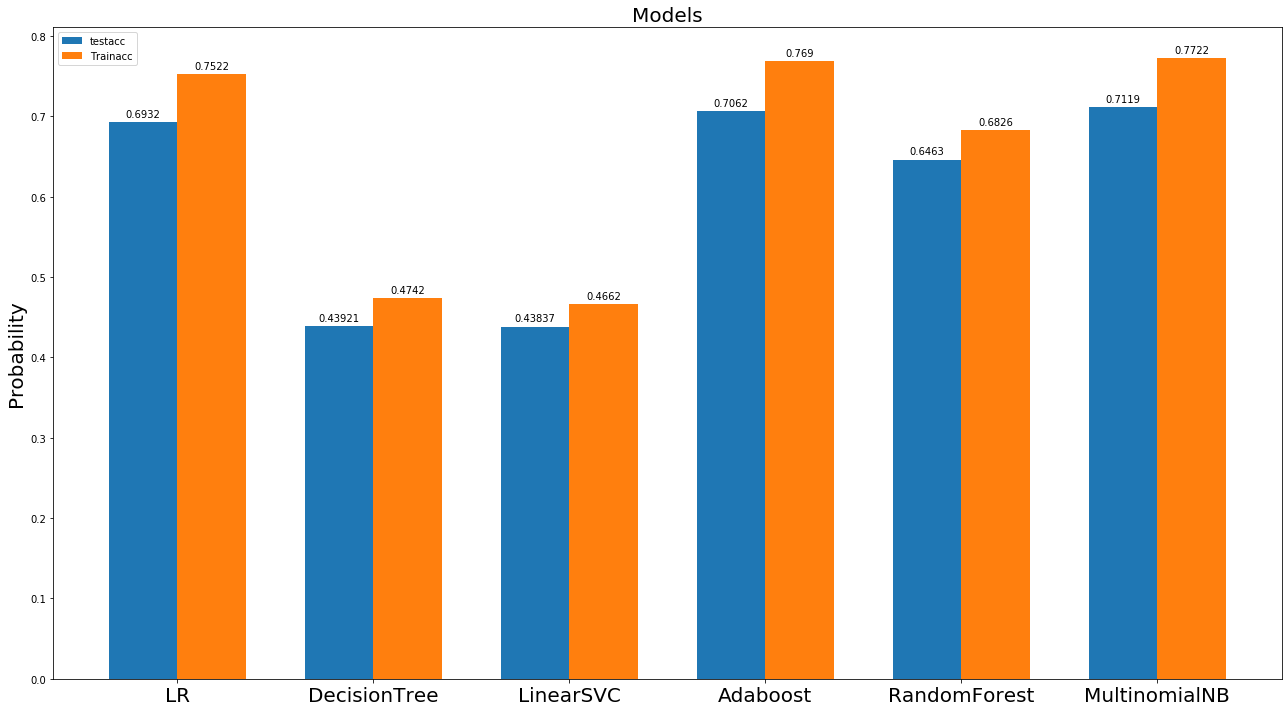

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['LR', 'DecisionTree', 'LinearSVC', 'Adaboost', 'RandomForest','MultinomialNB']
testacc= [0.6932,0.43921,0.43837,0.7062,0.6463,0.7119]
Trainacc= [0.7522,0.4742,0.4662,0.7690,0.6826,0.7722]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, testacc, width, label='testacc')
rects2 = ax.bar(x + width/2, Trainacc, width, label='Trainacc')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probability',fontsize=20)
ax.set_title('Models',fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=20)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.set_size_inches(18,10)
fig.tight_layout()
plt.savefig('plot_name111.jpg', dpi = 300)
plt.show()
